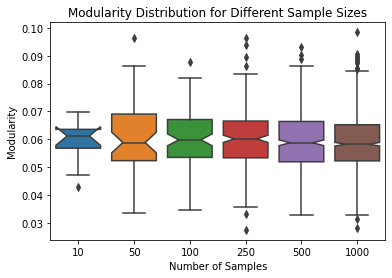

In [6]:
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def generate_er_graph(nodes, edges):
    """Generates an Erdős–Rényi random graph with a given number of nodes and edges."""
    p = 2 * edges / (nodes * (nodes - 1))  # Approximate probability for desired edges
    return nx.erdos_renyi_graph(nodes, p)

def compute_modularity(G):
    """Computes modularity of a given graph using the Louvain method."""
    partition = community_louvain.best_partition(G)
    return community_louvain.modularity(partition, G)

def run_experiment(nodes, edges, sample_sizes):
    """Runs the experiment for different sample sizes and collects modularity scores."""
    results = {}
    for n_samples in sample_sizes:
        modularity_scores = [compute_modularity(generate_er_graph(nodes, edges)) for _ in range(n_samples)]
        results[n_samples] = modularity_scores
    return results

def plot_results(results):
    """Plots the box plot of modularity scores for different sample sizes."""
    sns.boxplot(data=[results[s] for s in results], notch=True)
    plt.xticks(range(len(results)), [str(s) for s in results.keys()])
    plt.xlabel("Number of Samples")
    plt.ylabel("Modularity")
    plt.title("Modularity Distribution for Different Sample Sizes")
    plt.show()

if __name__ == "__main__":
    nodes = 24  # Number of nodes in the graph
    edges = 200  # Number of edges in the graph
    sample_sizes = [10, 50, 100, 250, 500, 1000]  # Different sample sizes
    
    results = run_experiment(nodes, edges, sample_sizes)
    plot_results(results)


/home/milky/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/milky/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/milky/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/milky/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/milky/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/milky/.lo

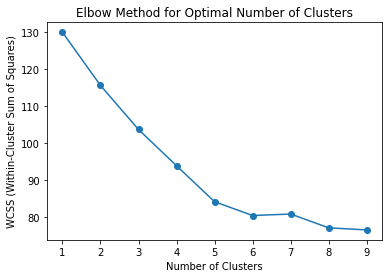

In [ ]:
import networkx as nx
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import numpy as np

# Example: Create a simple graph
G = nx.erdos_renyi_graph(100, 0.3)
adj_matrix = nx.to_numpy_array(G)  # Adjacency matrix

# Step 1: Try different numbers of clusters (k)
wcss = []  # List to store the within-cluster sum of squares for each k

for k in range(1, 10):
    clustering = SpectralClustering(n_clusters=k, affinity='precomputed', n_init=100)
    clustering.fit(adj_matrix)
    # WCSS can be approximated using the cluster labels
    wcss.append(np.sum((adj_matrix - np.mean(adj_matrix[clustering.labels_], axis=0))**2))

# Step 2: Plot the Elbow Method
plt.plot(range(1, 10), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()
